# Example Segmentation Results

In [1]:
%pylab inline

import logging
logging.basicConfig()
logger = logging.getLogger()
logger.setLevel(logging.WARNING)

import sys, os

# os.system("python -m io3d -l 3Dircadb1.1")
DATA_PATH = "3Dircadb1.1/PATIENT_DICOM"
import io3d

#PKG_PATH = "~/projects/bodynavigation"
PKG_PATH = "~/Programming/Sources/bodynavigation"
sys.path.append(os.path.expanduser(PKG_PATH))
from bodynavigation.organ_detection import OrganDetection

import matplotlib.pyplot as plt
import sed3

def show_segmented_slices(data3d, seg, axis=0):
    seg = seg.astype(np.uint8)
    shape = None
    if axis == 0: shape = [3,3]
    elif axis == 1: shape = [9,3]
    plt.figure(figsize = (15,15))
    sed3.show_slices(data3d, contour=(seg*2).astype(np.uint8), slice_step=20, axis=axis, shape=shape)

Populating the interactive namespace from numpy and matplotlib


In [2]:
data3d, metadata = io3d.datareader.read(io3d.datasets.join_path(DATA_PATH), dataplus_format=False)
voxelsize = metadata["voxelsize_mm"]
obj = OrganDetection(data3d, voxelsize)

## Segmentation results

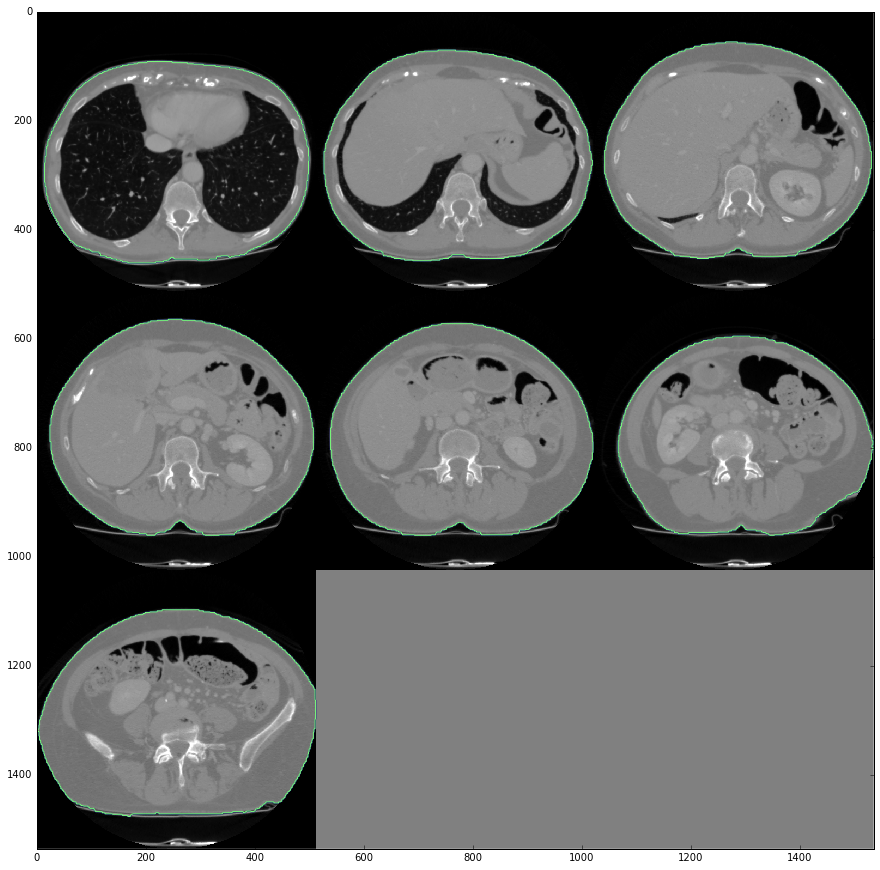

In [10]:
seg = obj.getBody()
show_segmented_slices(data3d, seg, axis=0)

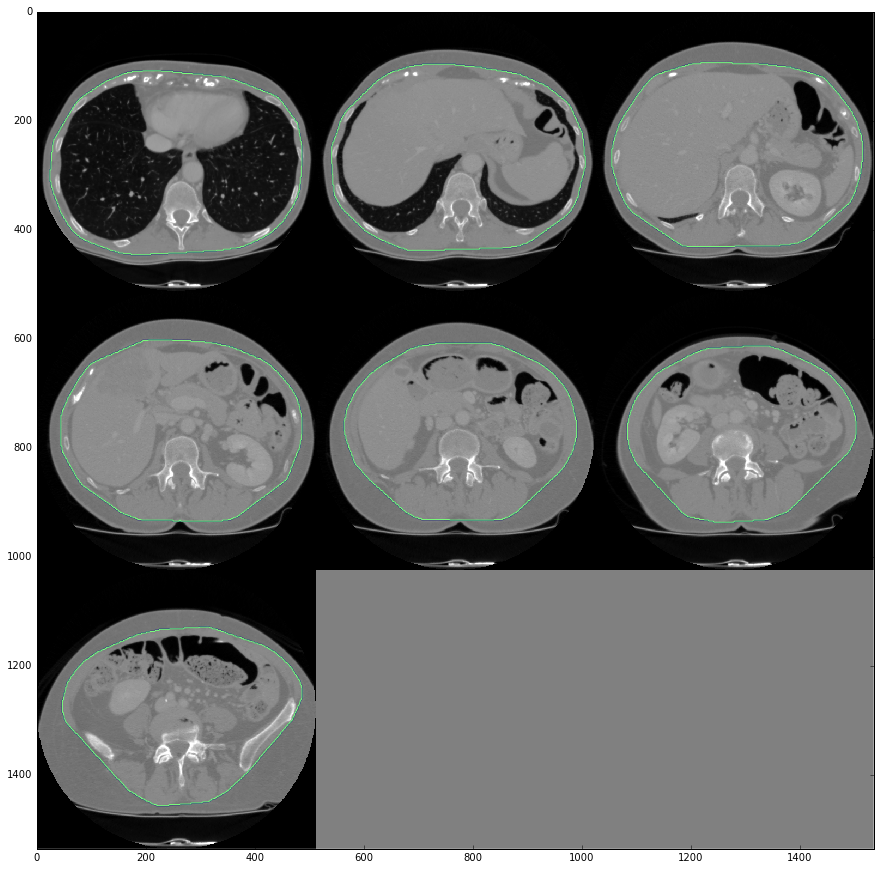

In [11]:
seg = obj.getFatlessBody()
show_segmented_slices(data3d, seg, axis=0)

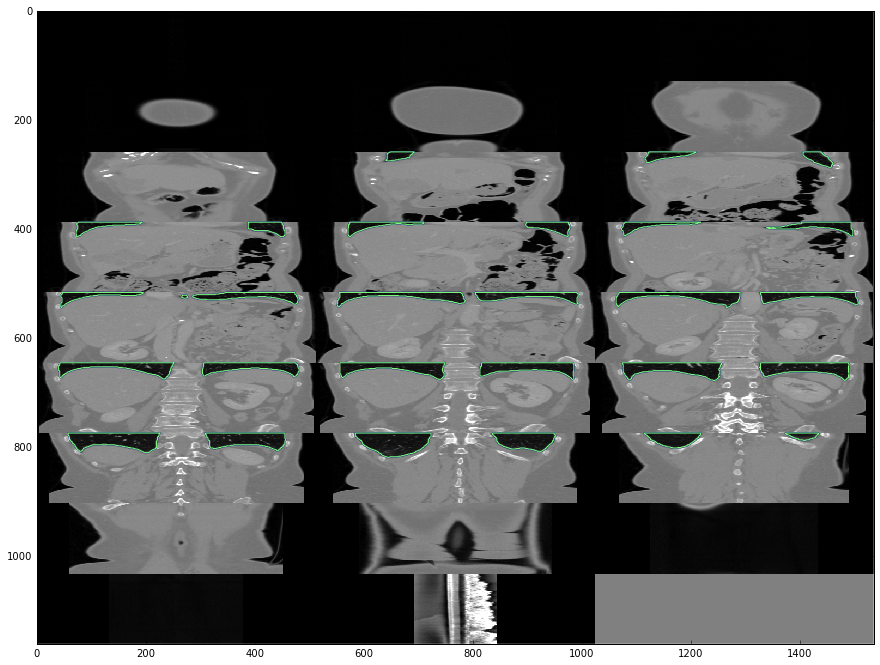

In [5]:
seg = obj.getLungs()
show_segmented_slices(data3d, seg, axis=1)

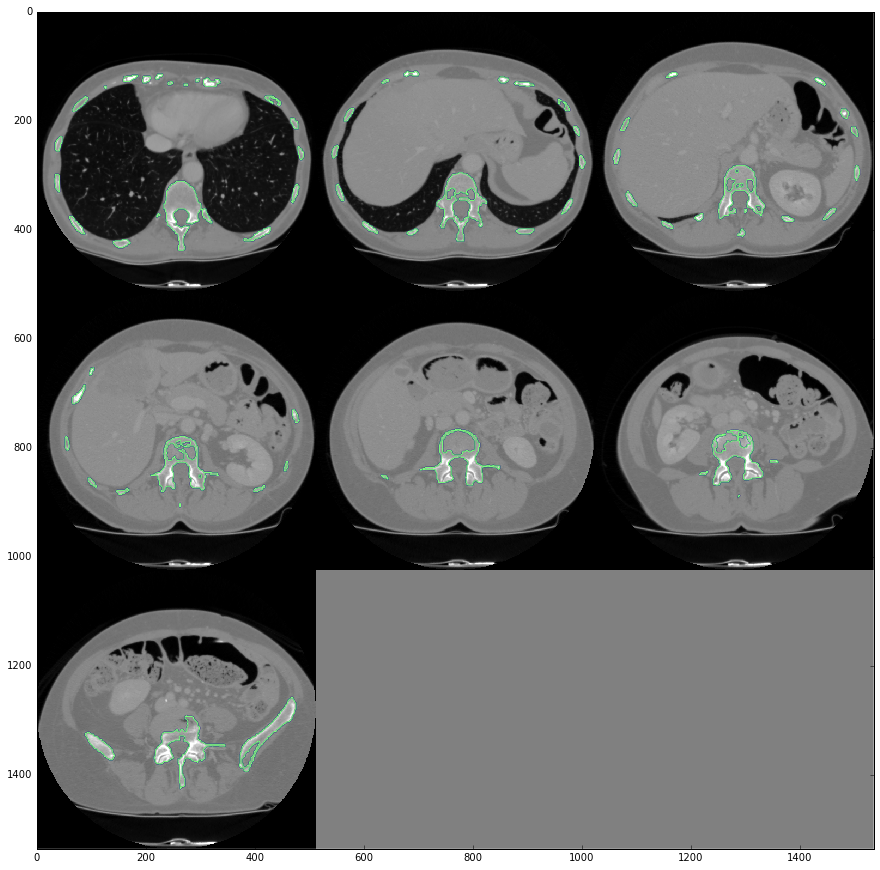

In [12]:
seg = obj.getBones()
show_segmented_slices(data3d, seg, axis=0)

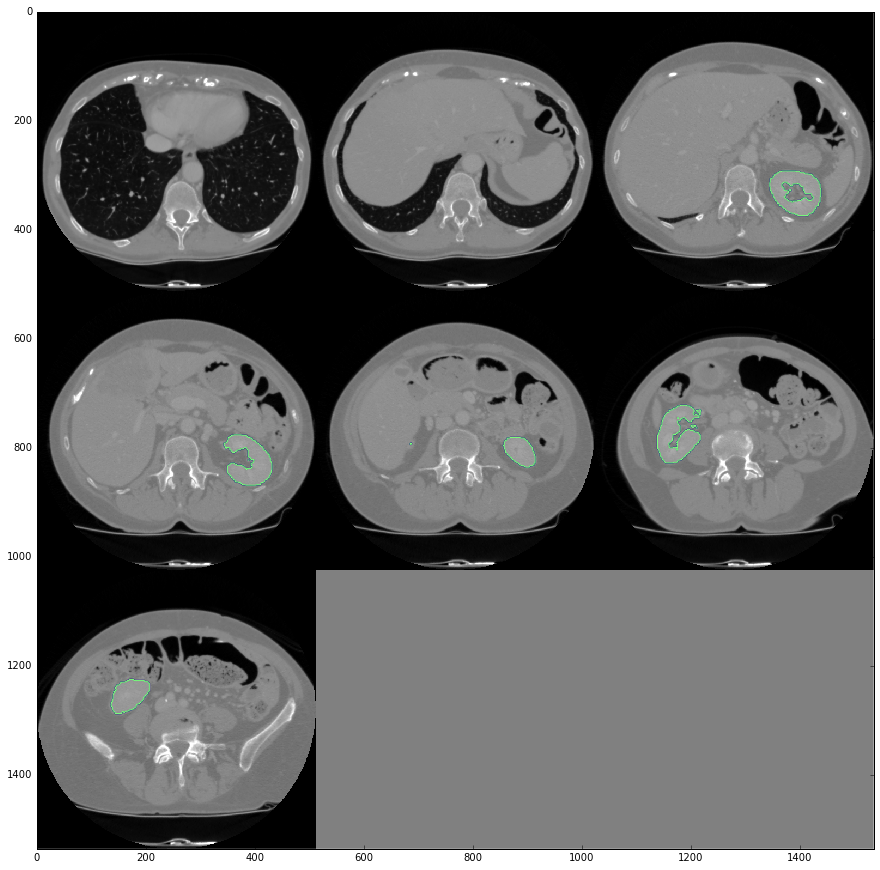

In [13]:
seg = obj.getKidneys()
show_segmented_slices(data3d, seg, axis=0)

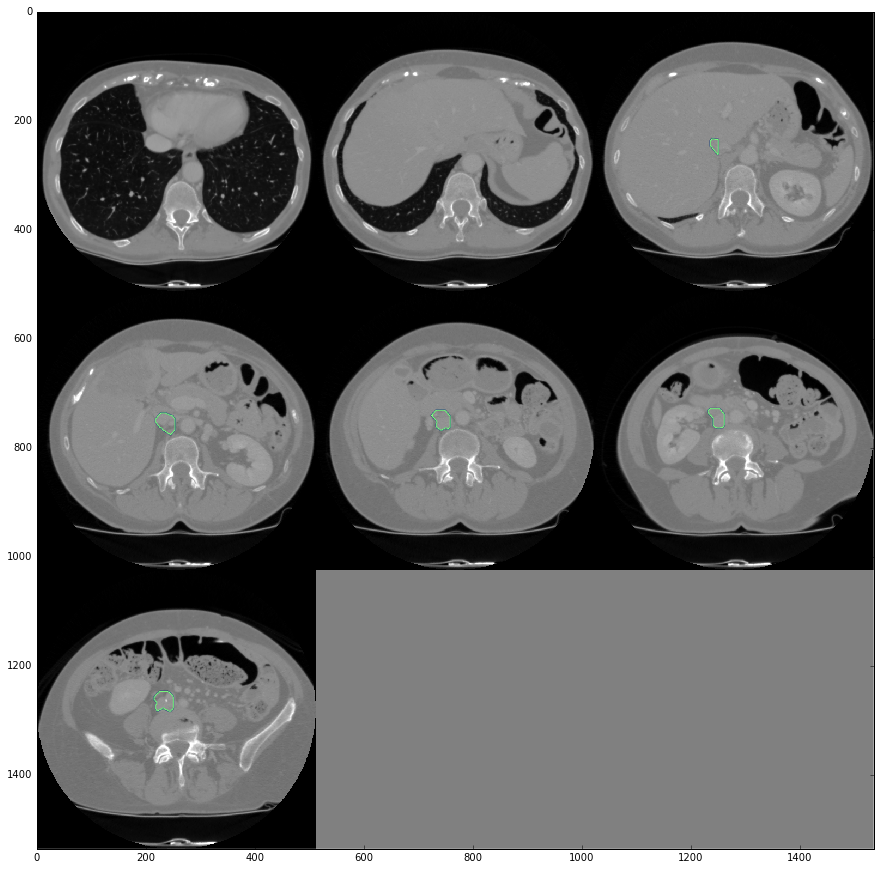

In [14]:
seg = obj.getVenaCava()
show_segmented_slices(data3d, seg, axis=0)

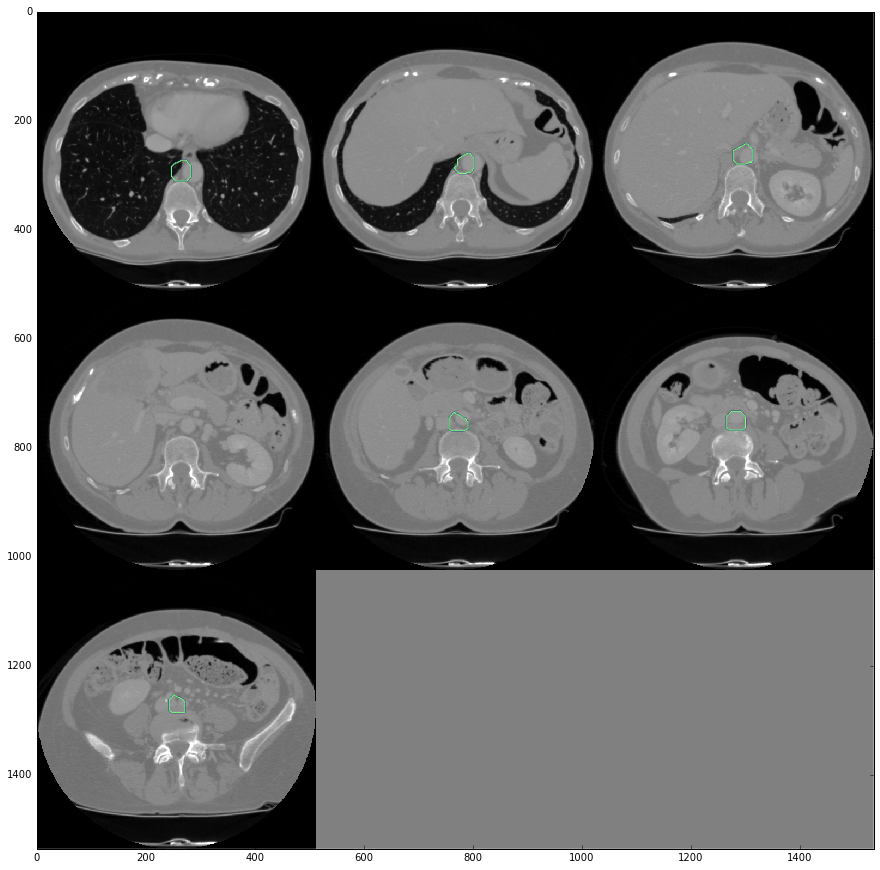

In [15]:
seg = obj.getAorta()
show_segmented_slices(data3d, seg, axis=0)